<a href="https://colab.research.google.com/github/teyang-lau/coffee-joint-rec-sys/blob/main/CDL_LOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import numpy as np
import pandas as pd
import io
username = 'shaunaloh'
token = 'xxxx'
github_session = requests.Session()
github_session.auth = (username, token)
train_url = 'https://raw.githubusercontent.com/teyang-lau/coffee-joint-rec-sys/main/data/processed/train_lol.csv'
val_url = 'https://raw.githubusercontent.com/teyang-lau/coffee-joint-rec-sys/main/data/processed/val_lol.csv'
test_url = 'https://raw.githubusercontent.com/teyang-lau/coffee-joint-rec-sys/main/data/processed/test_lol.csv'

In [2]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [3]:
!pip install --quiet cornac==1.7.1

     |████████████████████████████████| 10.0 MB 5.7 MB/s 


Get Data (all columns)

In [4]:
def get_data(url,username=username,token=token):
  download = github_session.get(url).content
  df = pd.read_csv(io.StringIO(download.decode('utf-8')))
  df = df[['shop', 'userid', 'rating', 'text']]
  return df

In [5]:
train = get_data(train_url)
train.head()

,shop,userid,rating,text
0,liho-tea-singapore-117,-5YMIME_WEin_by41Bj-3Q,3.0,The truffle series drink to me is the worst. L...
1,old-hen-coffee-bar-singapore-2,-5YMIME_WEin_by41Bj-3Q,4.0,Heard a lot about this cafe/bar so decided one...
2,two-men-bagel-house-singapore,-5YMIME_WEin_by41Bj-3Q,4.0,"Keeping this review short. Taste is good, but ..."
3,old-airport-road-food-centre-singapore,-5YMIME_WEin_by41Bj-3Q,5.0,Hello Foodies!\n\nThis is a place you must vis...
4,the-book-cafe-singapore,-G1YjYxjDpxOBzFgo36ORA,3.0,Another great standby - consistently great ser...


In [6]:
val = get_data(val_url)

In [7]:
test= get_data(test_url)

In [10]:
import matplotlib.pyplot as plt

In [18]:
len(train.userid.unique())

497

In [19]:
test

,shop,userid,rating,text
0,luna-singapore,-5YMIME_WEin_by41Bj-3Q,3.0,Their famous Yam cake is 7/10 in my opinion.\n...
1,common-man-coffee-roasters-singapore,-G1YjYxjDpxOBzFgo36ORA,2.0,"For the high cost of a nice environment, here ..."
2,chye-seng-huat-hardware-singapore,-WShM_YFbtG4OcE0vrFVyw,3.0,If you're not a coffee fan (like me) and can't...
3,chye-seng-huat-hardware-singapore,-XaIf12ricWc5z5BRt9nnQ,3.0,Good coffee. I mean really good coffee is actu...
4,meng-kitchen-singapore,-fUWq6sOIEe1uTUhNKS9sQ,5.0,My favourite place for bar chor mee! I've trie...
...,...,...,...,...
492,flor-patisserie-singapore,znaofcTB6CKmdUqJSd17iA,3.0,decent-alright japanese-styled-french cakes at...
493,two-blur-guys-singapore,zrT9ajIiHc_wUi-pC77aaQ,5.0,The best burger in Singapore... where is the s...
494,ya-kun-kaya-toast-singapore-9,zwVYz5sXfeaxdbRr7nXb7g,4.0,I knew I had to at least try a traditional Sin...
495,sinpopo-brand-singapore,zwmNnNkL2bTX5AsSdVs51w,5.0,This restaurant is really a hidden gem in Kato...


In [22]:
len(train['userid'].unique())

497

(array([613.,  66.,  36.,  15.,   8.,   6.,   3.,   0.,   1.,   1.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

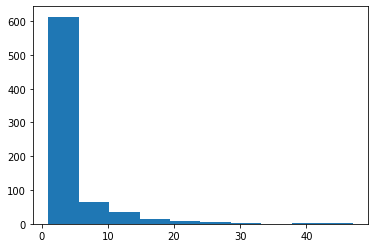

In [13]:
plt.hist(train['shop'].value_counts())

In [17]:
"""
Reference Notebook:
https://colab.research.google.com/github/PreferredAI/tutorials/blob/master/recommender-systems/09_deep_learning.ipynb

Source Code:
https://github.com/PreferredAI/tutorials/blob/master/recommender-systems/09_deep_learning.ipynb
"""

import os
import sys

import cornac
from cornac.data import Reader
from cornac.datasets import movielens, citeulike
from cornac.eval_methods import BaseMethod
from cornac.models import GMF, MLP, NeuMF, VAECF, CDL, ConvMF, WMF, CTR 
from cornac.data import TextModality
from cornac.data.text import BaseTokenizer

%tensorflow_version 1.x
import tensorflow as tf

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")

SEED = 42
VERBOSE = True

System version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Cornac version: 1.7.1
Tensorflow version: 1.15.2


In [18]:
#docs: corpus
#shop: item id
docs = train['text'].values.tolist()
item_ids = train['shop'].values.tolist()

In [19]:
merged_ratings = train[['userid','shop','rating']]
merged_records = merged_ratings.to_records(index=False)
merged_result = list(merged_records)

In [20]:
val_merged_ratings = val[['userid','shop','rating']]
val_merged_records = val_merged_ratings.to_records(index=False)
val_merged_result = list(val_merged_records)

In [21]:
merged_result[:5]

[('-5YMIME_WEin_by41Bj-3Q', 'liho-tea-singapore-117', 3.),
 ('-5YMIME_WEin_by41Bj-3Q', 'old-hen-coffee-bar-singapore-2', 4.),
 ('-5YMIME_WEin_by41Bj-3Q', 'two-men-bagel-house-singapore', 4.),
 ('-5YMIME_WEin_by41Bj-3Q', 'old-airport-road-food-centre-singapore', 5.),
 ('-G1YjYxjDpxOBzFgo36ORA', 'the-book-cafe-singapore', 3.)]

In [22]:
item_ids[:5]

['liho-tea-singapore-117',
 'old-hen-coffee-bar-singapore-2',
 'two-men-bagel-house-singapore',
 'old-airport-road-food-centre-singapore',
 'the-book-cafe-singapore']

In [23]:
docs[:5]

["The truffle series drink to me is the worst. Li Ho drink overall is ok but how did they came out with the truffle series leaves me feeling disgusted with the taste. \n\nMaybe it's my taste profile but I am unable to accept the taste at all. The service itself is good hence the 3 star. If it's taste, 1 star for the truffle series !",
 "Heard a lot about this cafe/bar so decided one day I should drop by and try this place. It was quite crowded and service staff was non existent. But that's fine, this is normal for Singapore as I can understand during this period we are severely lacking of service staff. \n\nWaited at least 20-30 minutes to get seated. Food was average, 6/10 in my opinion. Nothing fancy. But why is it rated 4 star by me ? Just when things was going downhill for me, I spotted people drinking from a bottle of cold brew which looks retro yet very good taste in terms of design. Ordered cold brew coffee, wow.... within 10 mins, ordered cold brew chocolate drink, WOW.... 10/1

CDL Vanilla Run

In [24]:
VOCAB_SIZE = 8000  # @param
MAX_DOC_FREQ = 0.5 # @param
NUM_FACTORS = 5  # @param
HIDDEN_DIM = 50  # @param
CNN_FILTER_SIZES = [2, 3, 4, 5]  # @param
CNN_NUM_FILTERS = 128  # @param
WORD_EMB_DIM = 32  # @param
SEQ_MAX_LENGTH = 50  # @param
DROPOUT_RATE = 0.2  # @param
LAMBDA_U = 0.1  # @param
LAMBDA_V = 0.1  # @param
NUM_EPOCHS = 5  # @param
CNN_EPOCHS = 3  # @param
CNN_BATCH_SIZE = 256  # @param
CNN_LEARNING_RATE = 0.001  # @param

convmf = ConvMF(k=NUM_FACTORS, n_epochs=NUM_EPOCHS, cnn_epochs=CNN_EPOCHS, cnn_bs=CNN_BATCH_SIZE,
                cnn_lr=CNN_LEARNING_RATE, emb_dim=WORD_EMB_DIM, max_len=SEQ_MAX_LENGTH,
                filter_sizes=CNN_FILTER_SIZES, num_filters=CNN_NUM_FILTERS, hidden_dim=HIDDEN_DIM, 
                dropout_rate=DROPOUT_RATE, lambda_u=LAMBDA_U, lambda_v=LAMBDA_V,
                seed=SEED, verbose=VERBOSE)

item_text_modality = TextModality(
    corpus=docs,
    ids=item_ids,
    tokenizer=BaseTokenizer(stop_words = "english"),
    max_vocab = VOCAB_SIZE,
    max_doc_freq = MAX_DOC_FREQ)

base = BaseMethod.from_splits(
    train_data = merged_result, 
    test_data = val_merged_result,
    rating_threshold = 3.5,
    item_text = item_text_modality,
    verbose = VERBOSE,
    seed = SEED,
    fmt='UIR')

eval_metrics = [
  cornac.metrics.NDCG(k = 5),
  cornac.metrics.NCRR(k = 5),
  cornac.metrics.Recall(k = 5)
]

exp = cornac.Experiment(
  eval_method = base, models = [convmf], metrics = eval_metrics, user_based = False
)

exp.run()

rating_threshold = 3.5
exclude_unknowns = False
---
Training data:
Number of users = 497
Number of items = 749
Number of ratings = 2822
Max rating = 5.0
Min rating = 1.0
Global mean = 3.8
---
Test data:
Number of users = 497
Number of items = 294
Number of ratings = 497
Number of unknown users = 0
Number of unknown items = 59
---
Total users = 497
Total items = 808

[ConvMF] Training started!
Epoch: 1/5


Optimizing CNN:   0%|          | 0/3 [00:00<?, ?it/s]

Loss: 36636.66541 Elapsed: 3.7610s Converge: 3663666541272150197700978627990785954605285623069671424.000000 
Epoch: 2/5


Optimizing CNN:   0%|          | 0/3 [00:00<?, ?it/s]

Loss: 27724.33637 Elapsed: 3.1875s Converge: 0.243263 
Epoch: 3/5


Optimizing CNN:   0%|          | 0/3 [00:00<?, ?it/s]

Loss: 23613.26967 Elapsed: 3.0659s Converge: 0.148284 
Epoch: 4/5


Optimizing CNN:   0%|          | 0/3 [00:00<?, ?it/s]

Loss: 21980.27236 Elapsed: 3.0915s Converge: 0.069156 
Epoch: 5/5


Optimizing CNN:   0%|          | 0/3 [00:00<?, ?it/s]

Loss: 20967.38662 Elapsed: 4.0304s Converge: 0.046082 

[ConvMF] Evaluation started!


Ranking:   0%|          | 0/497 [00:00<?, ?it/s]


TEST:
...
       | NCRR@5 | NDCG@5 | Recall@5 | Train (s) | Test (s)
------ + ------ + ------ + -------- + --------- + --------
ConvMF | 0.0038 | 0.0050 |   0.0085 |   18.4549 |   0.7011



In [25]:
from scipy.stats import hmean
print('Vanilla harmonic mean score: {:.4f}'.format(float(hmean([exp.result[0].metric_avg_results['NCRR@5'],
                                                                exp.result[0].metric_avg_results['NDCG@5'],
                                                                exp.result[0].metric_avg_results['Recall@5']]))))

Vanilla harmonic mean score: 0.0051


Hyperparameter Tuning

In [26]:
!pip install --quiet hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from hyperopt import tpe, hp, fmin, Trials, STATUS_OK

In [28]:
bestparams = []
bestharmonic = 0

NDCG = cornac.metrics.NDCG(5)
NCRR = cornac.metrics.NCRR(5)
Recall = cornac.metrics.Recall(5)

In [29]:
def ObjectiveF(params):
    global NDCG
    global NCRR
    global Recall
    global bestparams
    global bestharmonic
    
    VOCAB_SIZE = 8000
    MAX_DOC_FREQ = 0.5
    LAMBDA_U = 0.1
    LAMBDA_V = 0.1
    NUM_EPOCHS = 5
    CNN_EPOCHS = 5
    CNN_BATCH_SIZE = 256
    SEED = 42
    VERBOSE = False

    CNN_FILTER_SIZES = params['CNN_FILTER_SIZES']
    CNN_NUM_FILTERS = params['CNN_NUM_FILTERS']
    WORD_EMB_DIM = params['WORD_EMB_DIM']
    SEQ_MAX_LENGTH = params['SEQ_MAX_LENGTH']
    DROPOUT_RATE = params['DROPOUT_RATE']
    CNN_LEARNING_RATE = params['CNN_LEARNING_RATE']
    NUM_FACTORS = params['NUM_FACTORS']
    HIDDEN_DIM = params['HIDDEN_DIM']
    
    convmf = ConvMF(k=NUM_FACTORS, n_epochs=NUM_EPOCHS, cnn_epochs=CNN_EPOCHS, cnn_bs=CNN_BATCH_SIZE,
                    cnn_lr = CNN_LEARNING_RATE, emb_dim=WORD_EMB_DIM, max_len=SEQ_MAX_LENGTH,
                    filter_sizes=CNN_FILTER_SIZES, num_filters=CNN_NUM_FILTERS, hidden_dim=HIDDEN_DIM, 
                    dropout_rate=DROPOUT_RATE, lambda_u=LAMBDA_U, lambda_v=LAMBDA_V,
                    seed=SEED, verbose=VERBOSE)  

    test_result, val_result = base.evaluate(model = convmf, 
                                            metrics = [NDCG, NCRR, Recall], 
                                            user_based = False, 
                                            show_validation = False)
  
    Sample_NCRR = test_result.metric_avg_results['NCRR@5']
    Sample_NDCG = test_result.metric_avg_results['NDCG@5']
    Sample_Recall = test_result.metric_avg_results['Recall@5']
    Sample_HM = hmean([Sample_NCRR, Sample_NDCG, Sample_Recall])
    loss = -Sample_HM
    reportstring = f"""The Harmonic Mean for CNN_FILTER_SIZES={CNN_FILTER_SIZES}, CNN_NUM_FILTERS={CNN_NUM_FILTERS}, WORD_EMB_DIM={WORD_EMB_DIM}, SEQ_MAX_LENGTH={SEQ_MAX_LENGTH}, DROPOUT_RATE={DROPOUT_RATE}, CNN_LEARNING_RATE={CNN_LEARNING_RATE}, NUM_FACTORS={NUM_FACTORS}, HIDDEN_DIM={HIDDEN_DIM} is {loss}"""
    print(reportstring)

    if Sample_HM > bestharmonic:
        bestparams = (CNN_FILTER_SIZES, CNN_NUM_FILTERS, WORD_EMB_DIM, SEQ_MAX_LENGTH, DROPOUT_RATE, CNN_LEARNING_RATE, NUM_FACTORS, HIDDEN_DIM)
        bestharmonic = Sample_HM
    return loss

In [30]:
%%timeit
trials = Trials()

space = {
    'CNN_FILTER_SIZES': hp.choice('CNN_FILTER_SIZES', [[2, 3, 4, 5], [2, 2, 3, 3], [5, 5, 5, 5], [10, 20, 30, 40]]), 
    'CNN_NUM_FILTERS': hp.choice('CNN_NUM_FILTERS', np.array([64, 128, 256, 512])), 
    'WORD_EMB_DIM': hp.choice('WORD_EMB_DIM', np.array([32, 64, 128, 256, 512])), 
    'SEQ_MAX_LENGTH': hp.choice('SEQ_MAX_LENGTH', np.arange(50, 100, 10, dtype=int)), 
    'DROPOUT_RATE': hp.uniform('DROPOUT_RATE', 0.001, 0.01),  
    'CNN_LEARNING_RATE': hp.uniform('CNN_LEARNING_RATE', 0.001, 0.01),
    'NUM_FACTORS': hp.choice('NUM_FACTORS', np.array([5, 10, 15, 20])), 
    'HIDDEN_DIM': hp.choice('HIDDEN_DIM', np.array([50, 60, 70, 80, 90, 100]))
}

best = fmin(
    fn = ObjectiveF,
    space = space,
    algo = tpe.suggest,
    trials = trials,
    max_evals = 1
)


[ConvMF] Training started!

[ConvMF] Evaluation started!
  0%|          | 0/1 [05:23<?, ?it/s, best loss: ?]

Ranking:   0%|          | 0/497 [00:00<?, ?it/s]

The Harmonic Mean for CNN_FILTER_SIZES=(2, 2, 3, 3), CNN_NUM_FILTERS=512, WORD_EMB_DIM=256, SEQ_MAX_LENGTH=70, DROPOUT_RATE=0.005810316579380169, CNN_LEARNING_RATE=0.005620083168499362, NUM_FACTORS=20, HIDDEN_DIM=100 is -0.0028169014084507044
100%|██████████| 1/1 [05:24<00:00, 324.12s/it, best loss: -0.0028169014084507044]

[ConvMF] Training started!

[ConvMF] Evaluation started!
  0%|          | 0/1 [00:48<?, ?it/s, best loss: ?]

Ranking:   0%|          | 0/497 [00:00<?, ?it/s]

The Harmonic Mean for CNN_FILTER_SIZES=(2, 3, 4, 5), CNN_NUM_FILTERS=128, WORD_EMB_DIM=128, SEQ_MAX_LENGTH=60, DROPOUT_RATE=0.005355022632493603, CNN_LEARNING_RATE=0.00667444830184287, NUM_FACTORS=10, HIDDEN_DIM=70 is -0.005633802816901409
100%|██████████| 1/1 [00:48<00:00, 48.64s/it, best loss: -0.005633802816901409]

[ConvMF] Training started!

[ConvMF] Evaluation started!
  0%|          | 0/1 [00:55<?, ?it/s, best loss: ?]

Ranking:   0%|          | 0/497 [00:00<?, ?it/s]

The Harmonic Mean for CNN_FILTER_SIZES=(5, 5, 5, 5), CNN_NUM_FILTERS=128, WORD_EMB_DIM=128, SEQ_MAX_LENGTH=50, DROPOUT_RATE=0.0057264231831101785, CNN_LEARNING_RATE=0.003450488782910053, NUM_FACTORS=15, HIDDEN_DIM=100 is -0.005698901643268502
100%|██████████| 1/1 [00:55<00:00, 55.94s/it, best loss: -0.005698901643268502]

[ConvMF] Training started!

[ConvMF] Evaluation started!
  0%|          | 0/1 [17:57<?, ?it/s, best loss: ?]

Ranking:   0%|          | 0/497 [00:00<?, ?it/s]

The Harmonic Mean for CNN_FILTER_SIZES=(10, 20, 30, 40), CNN_NUM_FILTERS=256, WORD_EMB_DIM=256, SEQ_MAX_LENGTH=80, DROPOUT_RATE=0.005657269181758055, CNN_LEARNING_RATE=0.007885120640325712, NUM_FACTORS=10, HIDDEN_DIM=50 is -0.002902925181543599
100%|██████████| 1/1 [17:57<00:00, 1077.35s/it, best loss: -0.002902925181543599]

[ConvMF] Training started!

[ConvMF] Evaluation started!
  0%|          | 0/1 [00:52<?, ?it/s, best loss: ?]

Ranking:   0%|          | 0/497 [00:00<?, ?it/s]

The Harmonic Mean for CNN_FILTER_SIZES=(2, 2, 3, 3), CNN_NUM_FILTERS=512, WORD_EMB_DIM=32, SEQ_MAX_LENGTH=80, DROPOUT_RATE=0.002056912207483036, CNN_LEARNING_RATE=0.009965956853184979, NUM_FACTORS=5, HIDDEN_DIM=90 is -0.0028169014084507044
100%|██████████| 1/1 [00:52<00:00, 52.35s/it, best loss: -0.0028169014084507044]

[ConvMF] Training started!

[ConvMF] Evaluation started!
  0%|          | 0/1 [02:49<?, ?it/s, best loss: ?]

Ranking:   0%|          | 0/497 [00:00<?, ?it/s]

The Harmonic Mean for CNN_FILTER_SIZES=(2, 2, 3, 3), CNN_NUM_FILTERS=128, WORD_EMB_DIM=512, SEQ_MAX_LENGTH=60, DROPOUT_RATE=0.006894618422891912, CNN_LEARNING_RATE=0.007603330372256866, NUM_FACTORS=20, HIDDEN_DIM=50 is -0.01154387554958429
100%|██████████| 1/1 [02:49<00:00, 169.65s/it, best loss: -0.01154387554958429]
The slowest run took 22.14 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 48.7 s per loop


In [31]:
print(f'The best hyperparameters are: CNN_FILTER_SIZES={bestparams[0]}, CNN_NUM_FILTERS={bestparams[1]}, WORD_EMB_DIM={bestparams[2]}, SEQ_MAX_LENGTH={bestparams[3]}, DROPOUT_RATE={bestparams[4]}, CNN_LEARNING_RATE={bestparams[5]}, NUM_FACTORS={bestparams[6]}, HIDDEN_DIM={bestparams[7]}')
print(f'The harmonic mean from the best parameters is: {bestharmonic}')

The best hyperparameters are: CNN_FILTER_SIZES=(2, 2, 3, 3), CNN_NUM_FILTERS=128, WORD_EMB_DIM=512, SEQ_MAX_LENGTH=60, DROPOUT_RATE=0.006894618422891912, CNN_LEARNING_RATE=0.007603330372256866, NUM_FACTORS=20, HIDDEN_DIM=50
The harmonic mean from the best parameters is: 0.01154387554958429
